# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 pretrained model을 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.
    - 보통 Feature Extractor block을 재사용한다.

## Pytorch에서 제공하는 Pretrained Model 
- 분야별 라이브러리에서 제공
    - torchvision: https://pytorch.org/vision/stable/models.html
- torch hub 를 이용해 모델과 학습된 parameter를 사용할 수 있다.
    - https://pytorch.org/hub/
- 이외에도 많은 모델과 학습된 paramter가 인터넷상에 공개되 있다.    
    - 딥러닝 모델기반 application을 개발 할 때는 대부분 Transfer Learning을 한다.  
    - 다양한 분야에서 연구된 많은 딥러닝 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
    - [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 
    
>  **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## VGGNet Pretrained 모델을 이용해 이미지 분류

- Output으로 1000개의 class에 대한 확률을 출력한다.



In [1]:
# 1000개의 class 목록
!pip install wget
import wget
url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
imagenet_filepath = wget.download(url)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=925cf12fee00dd1a44e5fbaeb6278a5d3bba10b01a28035696d9942f4b3b1c42
  Stored in directory: /home/parking/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
download_path = r'./data/'

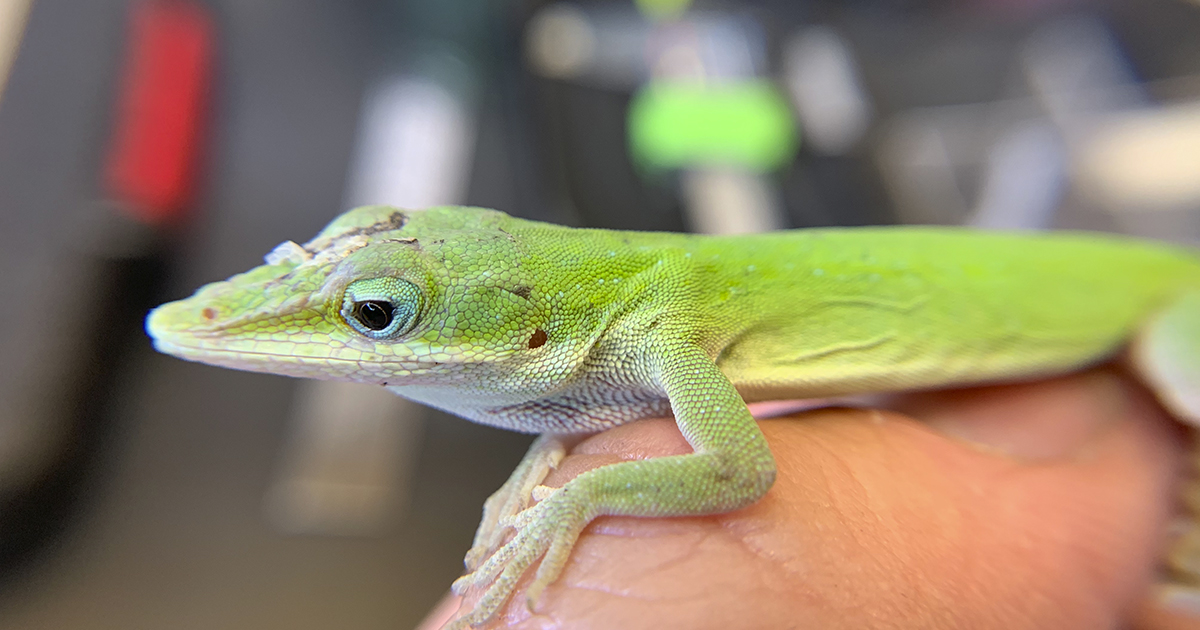

In [5]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG'
# img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
# img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
res = requests.get(img_url)
test_img = Image.open(BytesIO(res.content))
test_img

In [ ]:
# 토치비전설치, 토치인포 설치
!pip install torchvision
!pip install torchinfo

In [6]:
import torch
from torchvision import transforms, models
from torchinfo import summary

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
CPU = 'cpu'
DEVICE, CPU

('cuda', 'cpu')

In [9]:
load_model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
load_model_2  = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/parking/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 61.5MB/s] 


In [10]:
summary(load_model, input_size=(1, 3, 224, 224), device=DEVICE)

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [11]:
summary(load_model_2, input_size=(1, 3, 224, 224), device=DEVICE)

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

In [17]:
load_model = load_model.to(DEVICE)
input_data = torch.randn(1, 3, 224, 224).to(DEVICE)
pred_temp = load_model(input_data)

In [18]:
torch.nn.Softmax(dim=1)(pred_temp).sum()

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [19]:
pred_label = torch.argmax(pred_temp, dim=1)
pred_label

tensor([794], device='cuda:0')

# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- 모델/레이어의 parameter trainable 여부 속성 변경
    - model/layer 의 `parameters()` 메소드를 이용해 weight와 bias를 조회한 뒤 `requires_grad` 속성을 `False`로 변경한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 **재학습**시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 trainable로 한다.**

**<font size='5'>1. 전체 모델을 전부 학습시킨다.(1번)</font>**    
- Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
- 학습에 시간이 많이 걸린다.
    
    
**<font size='5'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**     
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
- **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
**<font size='5'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**      
- **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> **Custom dataset:** 내가 학습시키고자 하는 dataset 
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torchinfo import summary

from module.train import fit
from module.utils import plot_fit_result

import os
from zipfile import ZipFile
!pip install gdown -U
import gdown

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

In [ ]:
# download
url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
path = r'data/cats_and_dogs_small.zip'
gdown.download(url, path, quiet=False)